# Comparison

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from iclingo import Clingo, Model
import funcs
from funcs import BMDataFormat, AccumulatedStats
import matplotlib.pyplot as plt
import numpy as np
import os
import files
import glob
import json

In [2]:
from merger import Merger
# initialize merger
merger = Merger("../encodings/sequential", "../benchmark_data")
def merge(benchmark_id):
        benchmark = benchmarks[benchmark_id-1]
        return merger.merge(benchmark, vizualize=False, save_data=False, deterministic_waiter=True, check_validity=True, automated=False)
        
def mergeAll(exclude=[22,23,26]):
    for i in range(len(benchmarks)):
        benchmark_id = i+1
        benchmark = benchmarks[i]
        if benchmark_id in exclude:
            continue
        print("################## {} ###################".format(benchmark))
        merger.merge(benchmark, vizualize=False, save_data=True, automated=False, deterministic_waiter=True, check_validity=True)
        
# reading json benchmark data
def readJSONs(path):
    files = glob.glob(path)
    bmdfs = []
    for file in files:
        bmdfs.append(BMDataFormat())
        bmdfs[-1].load(file)
    return bmdfs

def getMetrics(bmdfs, indices):
    data = {}
    data['total'] = [0]*len(indices)
    data['SOAP'] = [0]*len(indices)
    for bmdf in bmdfs:
        i = 0
        try:
            i = indices.index(bmdf.data['instance'].replace('.lp',''))
        except:
            continue
        data['total'][i] = bmdf.data['statistics']['total']
        new_occurs = bmdf.data['model'].count('occurs(')
        instance = bmdf.data['instance']
        path = '../benchmarks/{}/plans/full_plan.lp'.format(instance.replace('.lp',''))
        f = files.ReadFile(path)
        orig_occurs = f.count('occurs(')
        data['SOAP'][i] = new_occurs - orig_occurs
    return data

def makedf(group1, group2, group3, group4=None, key=None, index=None):
    df = pd.DataFrame({'Aurelien & Florian': group1[key],
                       'Aaron, Anton & Louis': group2[key],
                       'Alan': group3[key],
                       'Daniel, Jakob & Nils': group4[key],
                       },index=index)
    return df

def plotGroup(df, index, ylim, axis_name, title, save_path):
    from matplotlib import rcParams
    rcParams.update({'figure.autolayout': True})
    ax = df.plot.bar(rot=0,figsize=(20,5),ylim=ylim)
    ax.axhline(y=0, color='gray', linestyle='-')
    ax.set_title(title)
    ax.set_xlabel("Benchmarks")
    ax.set_ylabel(axis_name)
    ax.set_xticklabels(index, fontdict=None, minor=False, rotation='vertical')
    fig = ax.get_figure()
    fig.savefig(save_path)

In [3]:
# read jsons of groups on common benchmarks
owrel = np.array(readJSONs("../../Project-KRR/benchmarks/*.json"))
aaron = np.array(readJSONs("../../Project-KRR/benchmarks_aaron/*.json"))
alan = np.array(readJSONs("../../Project-KRR/benchmarks_alan/*.json"))
jacob = readJSONs("../../Project-KRR/benchmarks_jacob/*.json")

selected_bms = [0,1,2,3,4,5,6,7,8,9,10,13,14,15,16,17,19,22]
index = [bmdf.data['instance'] for bmdf in np.array(aaron)[selected_bms]]

owrel_data = getMetrics(owrel, index)
aaron_data = getMetrics(aaron, index)
alan_data = getMetrics(alan, index)
jacob_data = getMetrics(jacob, index)

index = ['BM{}'.format(i[0:2]) for i in index]

In [4]:
#index = ['BM{}'.format(i) for i in range(n)]
df_total = makedf(owrel_data,aaron_data,alan_data,jacob_data, key='total', index=index)
df_SOAP = makedf(owrel_data,aaron_data,alan_data,jacob_data, key='SOAP', index=index)
#df_total

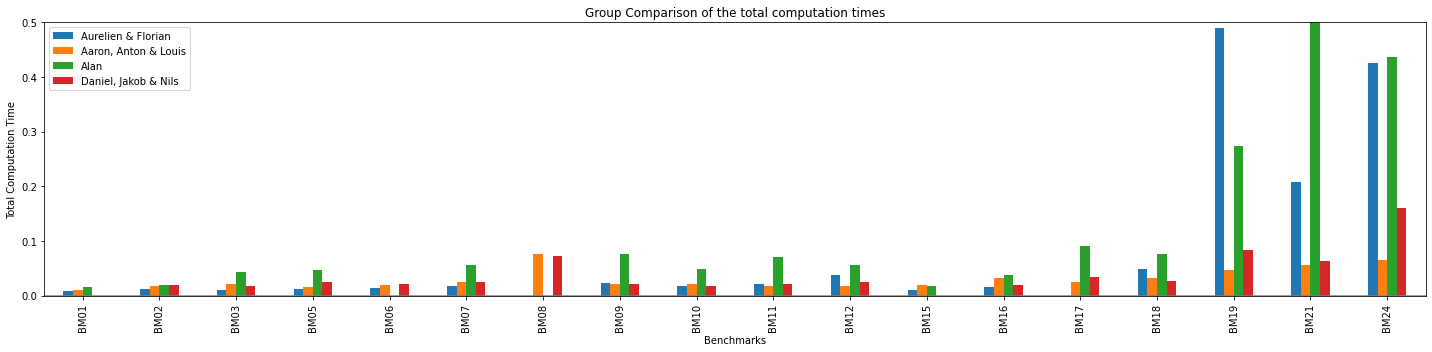

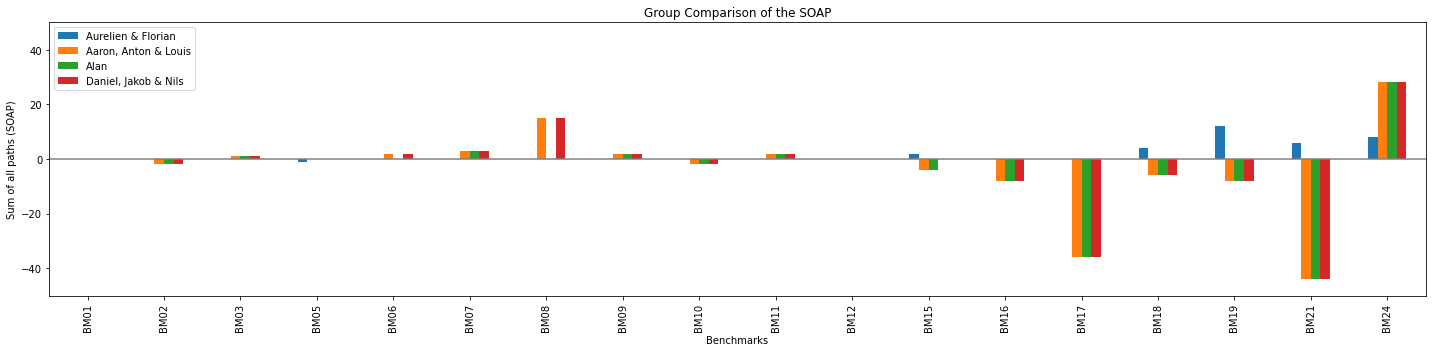

In [5]:
plotGroup(df_total, index, (0,0.5), 'Total Computation Time', 'Group Comparison of the total computation times', '../figures/group_comparison_total.png')
plotGroup(df_SOAP, index, (-50,50), 'Sum of all paths (SOAP)', 'Group Comparison of the SOAP', '../figures/group_comparison_SOAP.png')